In [24]:
import pyreadr
import pandas as pd
#from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, StandardScaler

from dfply import *



In [25]:

#a function to group the participants into high, middle and low responders
def response_category(df):
    """
    This function takes as input a dataframe that has columns named "pct_muscle_change"
    and "scaled_pct_change". It categorises participants as "High responder" if they
    belong to the upper 75% category in scaled percentage change; no_responder if they have pct_change_scores 0 0r below,
    average_responder if they are neither high nor no responders
    """
    if (df["scaled_pct_change"] >= 0.75):
        return "High_responder"
    if  (df["pct_muscle_change"] > 0 and df["scaled_pct_change"] < 0.75 ):
        return "Average_responder"
    if ( df["pct_muscle_change"] <= 0):
        return "No_responder"
    
    

In [26]:
# Load the COPD metadata and convert to pandas dataframe,,,,,,
copd_metadata = pyreadr.read_r("./COPD/copd_metadata.RDS")
copd_metadata = copd_metadata[None]

# scale participants based on their percentage change muscle
# Initialize the scaler
scaler = MinMaxScaler()
copd_metadata["scaled_pct_change"] = scaler.fit_transform(copd_metadata[["pct_muscle_change"]])

#categorise participants based on percentage muscle change
copd_metadata["category"] = copd_metadata.apply(response_category, axis = 1)
copd_metadata = copd_metadata[["study", "participant", "sex", "seq_sample_id", "age", "BMI", "pct_muscle_change", 
                               "scaled_pct_change", "category", "volume", "condition"]]
copd_metadata


,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,copd,FP102,female,X102PreExcVLR12,65.8,36.6,-1.98,0.358476,No_responder,3.0,RM30
1,copd,FP102,female,X102PreExcVLR12,65.8,36.6,17.24,0.836943,High_responder,3.0,RM10
2,copd,FP103,male,X103PreExcVLR23,70.9,28.5,6.81,0.577296,Average_responder,3.0,RM10
3,copd,FP103,male,X103PreExcVLR23,70.9,28.5,14.01,0.756535,High_responder,3.0,RM30
4,copd,FP105,female,X105PreExcVLR38,67.0,24.6,13.87,0.753050,High_responder,3.0,RM30
...,...,...,...,...,...,...,...,...,...,...,...
98,copd,FP246,female,X246PreExcVLR518,64.3,22.4,6.10,0.559622,Average_responder,3.0,RM10
99,copd,FP246,female,X246PreExcVLL519,64.3,22.4,3.88,0.504356,Average_responder,3.0,RM30
100,copd,FP249,male,X249PreExcVLL529,63.6,22.0,4.32,0.515310,Average_responder,3.0,RM30
101,copd,FP249,male,X249PreExcVLL529,63.6,22.0,3.34,0.490914,Average_responder,3.0,RM10


(array([ 1.,  0.,  4., 12., 10., 31., 18., 13., 10.,  4.]),
 array([-16.38 , -12.363,  -8.346,  -4.329,  -0.312,   3.705,   7.722,
         11.739,  15.756,  19.773,  23.79 ]),
 <BarContainer object of 10 artists>)

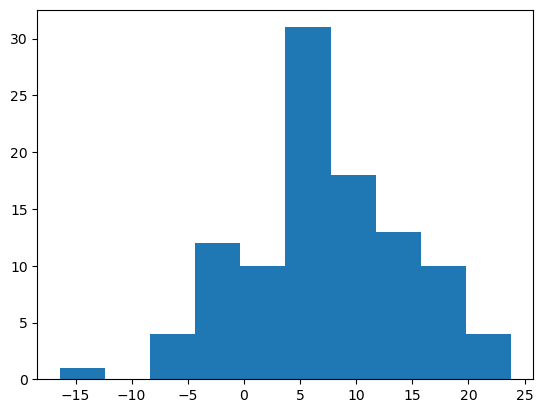

In [7]:
plt.hist(copd_metadata["pct_muscle_change"])

(array([ 1.,  0.,  4., 12., 10., 31., 18., 13., 10.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

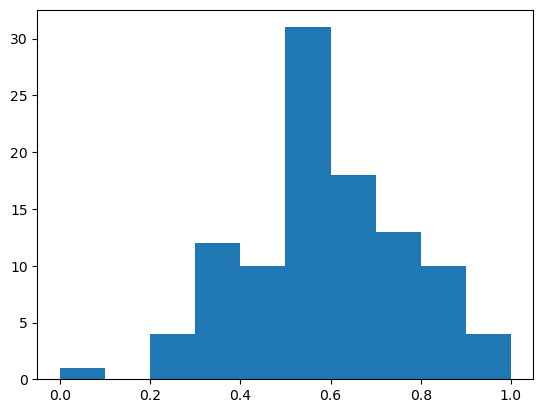

In [8]:
plt.hist(copd_metadata["scaled_pct_change"])

<Axes: xlabel='category', ylabel='count'>

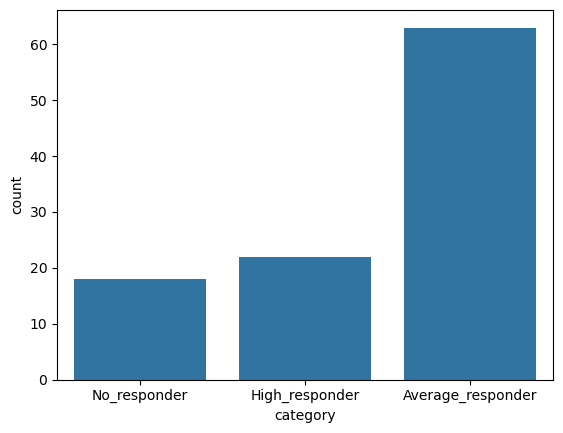

In [9]:
sns.countplot(x = copd_metadata["category"])

In [27]:
# Load Contratrain metadata
contratrain_metadata = pyreadr.read_r("./ContraTrain/Contratrain_metadata.RDS")
contratrain_metadata = contratrain_metadata[None]
contratrain_metadata["scaled_pct_change"] = scaler.fit_transform(contratrain_metadata[["pct_muscle_change"]])

contratrain_metadata["category"] = contratrain_metadata.apply(response_category, axis = 1)
contratrain_metadata = contratrain_metadata[["study", "participant", "sex", "seq_sample_id", "age", "BMI", "pct_muscle_change",
                                             "scaled_pct_change", "category", "volume", "condition"]]
contratrain_metadata

,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,ct,FP1,female,X1.subj1sample1,21.0,28.6,3.78,0.223378,Average_responder,0.0,RM10
1,ct,FP1,female,X2.subj1sample6,21.0,28.6,12.98,0.411057,Average_responder,3.0,RM10
2,ct,FP2,male,X43.subj2sample4,24.0,31.2,9.88,0.347817,Average_responder,3.0,RM10
3,ct,FP2,male,X44.subj2sample6,24.0,31.2,9.23,0.334557,Average_responder,6.0,RM10
4,ct,FP3,female,X75.subj3sample5,23.0,22.5,17.03,0.493676,Average_responder,6.0,RM10
...,...,...,...,...,...,...,...,...,...,...,...
59,ct,FP43,female,X108.subj43sample3,24.0,40.1,-1.62,0.113219,No_responder,0.0,RM10
60,ct,FP44,female,X113.subj44sample4,30.0,24.6,10.30,0.356385,Average_responder,3.0,RM10
61,ct,FP45,female,X116.subj45sample4,20.0,26.2,2.46,0.196450,Average_responder,3.0,RM10
62,ct,FP46,female,X121.subj46sample7,22.0,22.9,3.90,0.225826,Average_responder,0.0,RM10


(array([ 4., 16., 13., 12., 13.,  2.,  3.,  0.,  0.,  1.]),
 array([-7.17 , -2.268,  2.634,  7.536, 12.438, 17.34 , 22.242, 27.144,
        32.046, 36.948, 41.85 ]),
 <BarContainer object of 10 artists>)

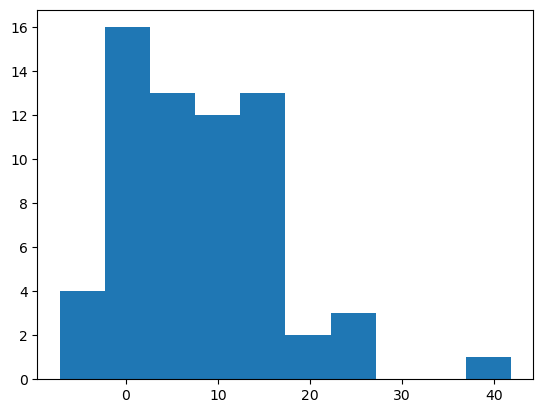

In [11]:
plt.hist(contratrain_metadata["pct_muscle_change"])

(array([ 4., 16., 13., 12., 13.,  2.,  3.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

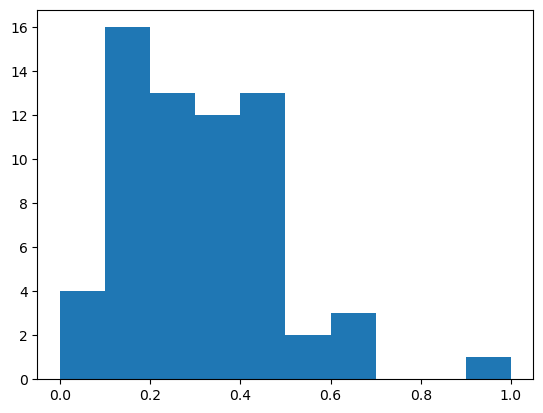

In [12]:
plt.hist(contratrain_metadata["scaled_pct_change"])

<Axes: xlabel='category', ylabel='count'>

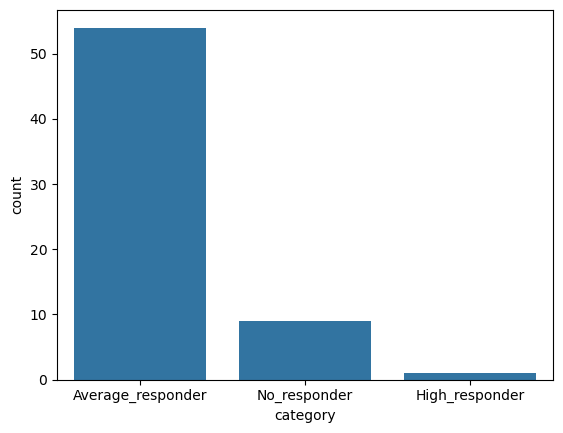

In [13]:
sns.countplot(x = contratrain_metadata["category"])

In [29]:
# Load Alpha_Omega metadata
AO_metadata = pyreadr.read_r("./Alpha_Omega/Alpha_Omega_metadata.RDS")
AO_metadata = AO_metadata[None]
AO_metadata["scaled_pct_change"] = scaler.fit_transform(AO_metadata[["pct_muscle_change"]])
AO_metadata["category"] = AO_metadata.apply(response_category, axis = 1)
AO_metadata = AO_metadata[["study", "participant", "sex", "seq_sample_id", "age", "BMI", "pct_muscle_change",
                           "scaled_pct_change", "category", "volume", "condition"]]
AO_metadata

,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,Alpha/Omega,516,male,s104,46.0,29.0,18.75,0.422212,Average_responder,3.0,RM10
1,Alpha/Omega,517,male,s112,53.0,30.3,12.66,0.327085,Average_responder,3.0,RM10
2,Alpha/Omega,503,male,s13,46.0,25.3,50.37,0.916120,High_responder,3.0,RM10
3,Alpha/Omega,520,male,s130,58.0,29.9,8.62,0.263980,Average_responder,3.0,RM10
4,Alpha/Omega,521,female,s136,48.0,18.4,33.69,0.655576,Average_responder,3.0,RM10
...,...,...,...,...,...,...,...,...,...,...,...
161,Alpha/Omega,683,female,s874,35.0,29.3,2.60,0.169947,Average_responder,3.0,RM30
162,Alpha/Omega,684,female,s875,48.0,31.6,24.79,0.516557,Average_responder,3.0,RM30
163,Alpha/Omega,692,male,s883,58.0,23.9,43.34,0.806311,High_responder,3.0,RM30
164,Alpha/Omega,693,female,s891,54.0,21.8,21.82,0.470166,Average_responder,3.0,RM30


(array([ 6., 16., 47., 36., 31., 15.,  9.,  4.,  2.,  2.]),
 array([-8.28 , -1.878,  4.524, 10.926, 17.328, 23.73 , 30.132, 36.534,
        42.936, 49.338, 55.74 ]),
 <BarContainer object of 10 artists>)

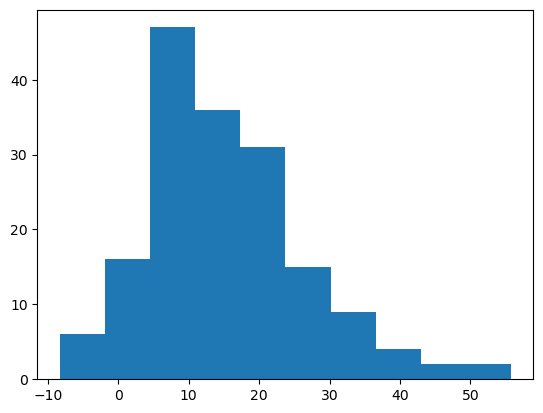

In [15]:
plt.hist(AO_metadata["pct_muscle_change"])

(array([ 6., 16., 47., 36., 31., 15.,  9.,  4.,  2.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

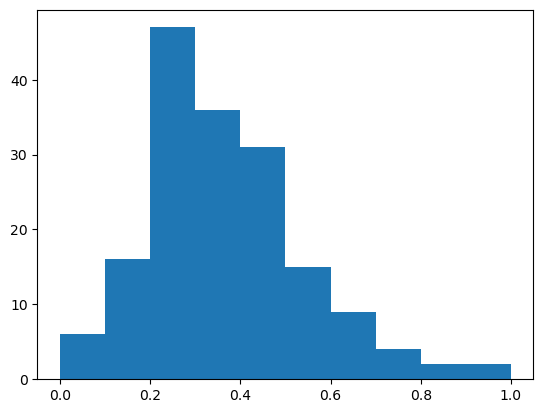

In [16]:
plt.hist(AO_metadata["scaled_pct_change"])

<Axes: xlabel='category', ylabel='count'>

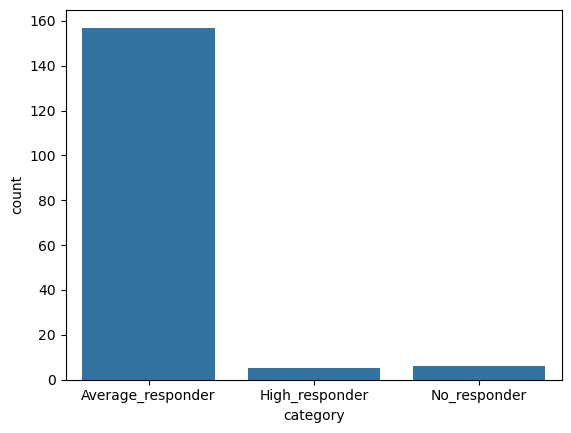

In [17]:
sns.countplot(x =AO_metadata["category"])

In [30]:
# Load Volume metadata
Volume_metadata = pyreadr.read_r("./Volume/Volume_metadata.RDS")
Volume_metadata = Volume_metadata[None]
Volume_metadata["scaled_pct_change"] = scaler.fit_transform(Volume_metadata[["pct_muscle_change"]])
Volume_metadata["category"] = Volume_metadata.apply(response_category, axis = 1)
Volume_metadata = Volume_metadata[["study", "participant", "sex", "seq_sample_id", "age", "BMI", "pct_muscle_change",
                                   "scaled_pct_change", "category", "volume", "condition"]]
Volume_metadata

,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,vol,FP11,male,FP11w0R,22.3,23.6,0.18,0.162500,Average_responder,3.0,RM10
1,vol,FP11,male,FP11w0L,22.3,23.6,-1.53,0.043750,No_responder,1.0,RM10
2,vol,FP12,female,FP12w0R,21.3,22.8,-0.60,0.108333,No_responder,3.0,RM10
3,vol,FP12,female,FP12w0L,21.3,22.8,0.68,0.197222,Average_responder,1.0,RM10
4,vol,FP13,male,FP13w0L,22.7,19.8,12.12,0.991667,High_responder,3.0,RM10
5,vol,FP13,male,FP13w0R,22.7,19.8,6.72,0.616667,Average_responder,1.0,RM10
6,vol,FP14,female,FP14w0R,22.1,24.1,6.45,0.597917,Average_responder,3.0,RM10
7,vol,FP14,female,FP14w0L,22.1,24.1,6.16,0.577778,Average_responder,1.0,RM10
8,vol,FP15,male,FP15w0R,23.6,21.1,5.26,0.515278,Average_responder,3.0,RM10
9,vol,FP15,male,FP15w0L,23.6,21.1,2.68,0.336111,Average_responder,1.0,RM10


(array([5., 9., 7., 5., 4., 5., 8., 3., 1., 3.]),
 array([-2.16, -0.72,  0.72,  2.16,  3.6 ,  5.04,  6.48,  7.92,  9.36,
        10.8 , 12.24]),
 <BarContainer object of 10 artists>)

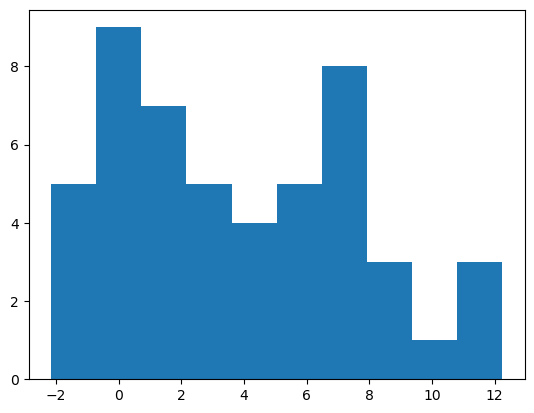

In [16]:
plt.hist(Volume_metadata["pct_muscle_change"])

(array([5., 9., 7., 5., 4., 5., 8., 3., 1., 3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

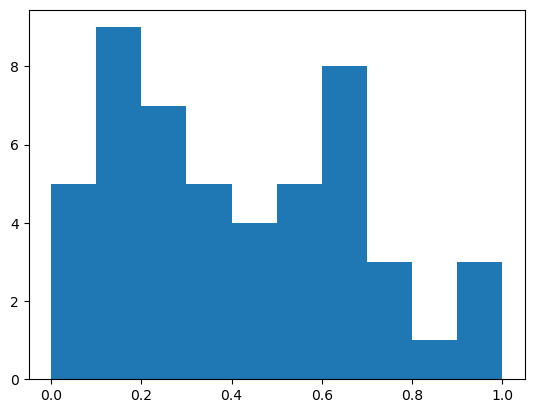

In [17]:
plt.hist(Volume_metadata["scaled_pct_change"])

<Axes: xlabel='category', ylabel='count'>

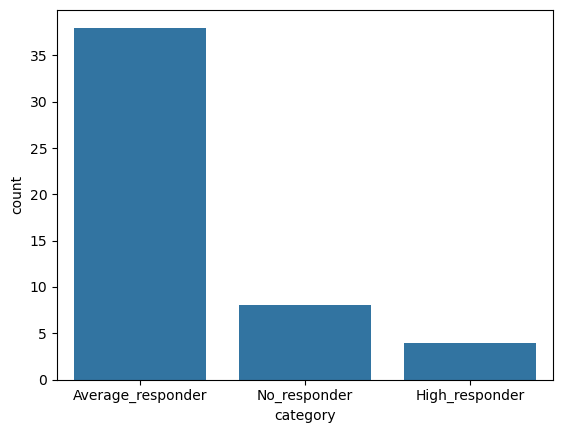

In [18]:
sns.countplot(x = Volume_metadata["category"])

In [31]:
# Load Relief metadata
Relief_metadata = pyreadr.read_r("./Relief/Relief_metadata.RDS")
Relief_metadata = Relief_metadata[None]

Relief_metadata["scaled_pct_change"] = scaler.fit_transform(Relief_metadata[["pct_muscle_change"]])

Relief_metadata["category"] = Relief_metadata.apply(response_category, axis = 1)
Relief_metadata = Relief_metadata[["study", "participant", "sex", "seq_sample_id", "age", "BMI", "pct_muscle_change",
                                   "scaled_pct_change", "category", "volume", "condition"]]
Relief_metadata


,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,ReLiEf,3003,male,R_8,27.0,25.9,33.45,0.684512,Average_responder,1.0,RM10
1,ReLiEf,3006,male,R_18,21.0,24.5,4.39,0.322709,Average_responder,1.0,RM10
2,ReLiEf,3007,male,R_25,73.0,24.2,-16.01,0.068725,No_responder,1.0,RM10
3,ReLiEf,3009,male,R_30,79.0,26.0,33.09,0.680030,Average_responder,3.0,RM10
4,ReLiEf,3009,male,R_34,79.0,26.0,3.29,0.309014,Average_responder,1.0,RM10
...,...,...,...,...,...,...,...,...,...,...,...
73,ReLiEf,3075,male,R_321,81.0,22.6,8.58,0.374875,Average_responder,3.0,RM10
74,ReLiEf,3079,male,R_331,23.0,28.7,23.89,0.565488,Average_responder,3.0,RM10
75,ReLiEf,3083,male,R_342,72.0,29.4,18.51,0.498506,Average_responder,1.0,RM10
76,ReLiEf,3084,male,R_348,80.0,20.2,-6.90,0.182146,No_responder,3.0,RM10


(array([ 5.,  8., 16., 16., 19.,  7.,  4.,  2.,  0.,  1.]),
 array([-21.53 , -13.498,  -5.466,   2.566,  10.598,  18.63 ,  26.662,
         34.694,  42.726,  50.758,  58.79 ]),
 <BarContainer object of 10 artists>)

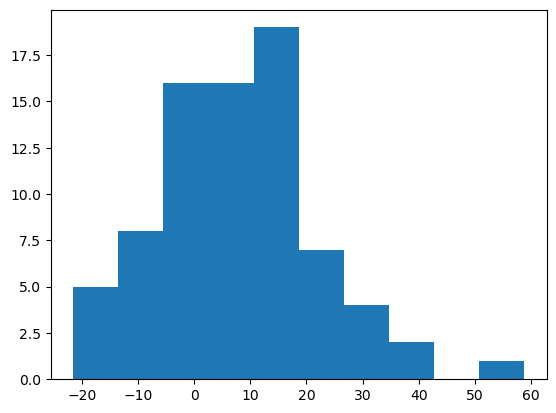

In [20]:
plt.hist(Relief_metadata["pct_muscle_change"])

(array([ 5.,  8., 16., 16., 19.,  7.,  4.,  2.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

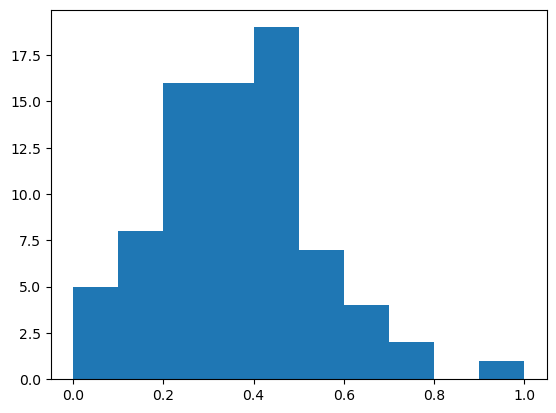

In [21]:
plt.hist(Relief_metadata["scaled_pct_change"])

<Axes: xlabel='category', ylabel='count'>

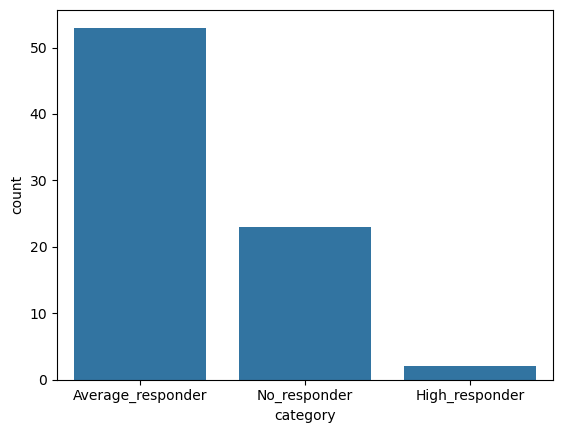

In [22]:
sns.countplot(x = Relief_metadata["category"])

In [36]:
# Concatenate dataset into one
full_metadata = pd.concat([AO_metadata, contratrain_metadata, copd_metadata,Relief_metadata, Volume_metadata], ignore_index = True)
# distinguish each participant from the other in studies
full_metadata["participant"] = full_metadata["study"] + "_" + full_metadata["participant"]
# volume is integer
full_metadata["volume"] = full_metadata["volume"].astype(int)
full_metadata

,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,Alpha/Omega,Alpha/Omega_516,male,s104,46.0,29.0,18.75,0.422212,Average_responder,3,RM10
1,Alpha/Omega,Alpha/Omega_517,male,s112,53.0,30.3,12.66,0.327085,Average_responder,3,RM10
2,Alpha/Omega,Alpha/Omega_503,male,s13,46.0,25.3,50.37,0.916120,High_responder,3,RM10
3,Alpha/Omega,Alpha/Omega_520,male,s130,58.0,29.9,8.62,0.263980,Average_responder,3,RM10
4,Alpha/Omega,Alpha/Omega_521,female,s136,48.0,18.4,33.69,0.655576,Average_responder,3,RM10
...,...,...,...,...,...,...,...,...,...,...,...
456,vol,vol_FP6,female,FP6w0R,21.8,20.5,-0.81,0.093750,No_responder,1,RM10
457,vol,vol_FP7,male,FP7w0L,21.2,28.2,8.34,0.729167,Average_responder,3,RM10
458,vol,vol_FP7,male,FP7w0R,21.2,28.2,11.31,0.935417,High_responder,1,RM10
459,vol,vol_FP9,male,FP9w0R,20.6,21.2,7.17,0.647917,Average_responder,3,RM10


<Axes: xlabel='category', ylabel='count'>

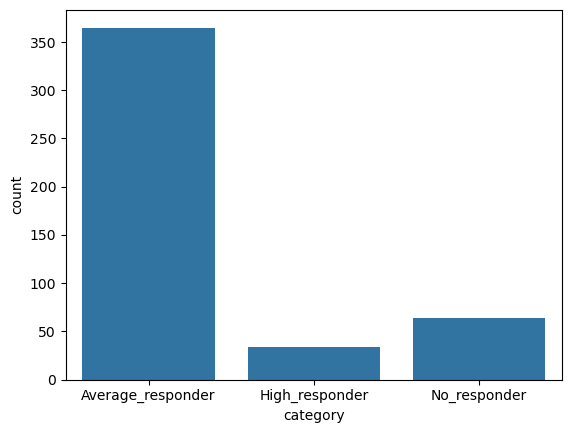

In [24]:
sns.countplot(x = full_metadata["category"])

In [38]:
# concatenate all metadata except. This is to check the effect of muscle measurement tool

metadata = pd.concat([AO_metadata, contratrain_metadata, copd_metadata,Relief_metadata], ignore_index = True)
# distinguish each participant from the other in studies
metadata["participant"] = metadata["study"] + "_" + metadata["participant"]
metadata["volume"] = metadata["volume"].astype(int)
metadata

,study,participant,sex,seq_sample_id,age,BMI,pct_muscle_change,scaled_pct_change,category,volume,condition
0,Alpha/Omega,Alpha/Omega_516,male,s104,46.0,29.0,18.75,0.422212,Average_responder,3,RM10
1,Alpha/Omega,Alpha/Omega_517,male,s112,53.0,30.3,12.66,0.327085,Average_responder,3,RM10
2,Alpha/Omega,Alpha/Omega_503,male,s13,46.0,25.3,50.37,0.916120,High_responder,3,RM10
3,Alpha/Omega,Alpha/Omega_520,male,s130,58.0,29.9,8.62,0.263980,Average_responder,3,RM10
4,Alpha/Omega,Alpha/Omega_521,female,s136,48.0,18.4,33.69,0.655576,Average_responder,3,RM10
...,...,...,...,...,...,...,...,...,...,...,...
406,ReLiEf,ReLiEf_3075,male,R_321,81.0,22.6,8.58,0.374875,Average_responder,3,RM10
407,ReLiEf,ReLiEf_3079,male,R_331,23.0,28.7,23.89,0.565488,Average_responder,3,RM10
408,ReLiEf,ReLiEf_3083,male,R_342,72.0,29.4,18.51,0.498506,Average_responder,1,RM10
409,ReLiEf,ReLiEf_3084,male,R_348,80.0,20.2,-6.90,0.182146,No_responder,3,RM10


<Axes: xlabel='category', ylabel='count'>

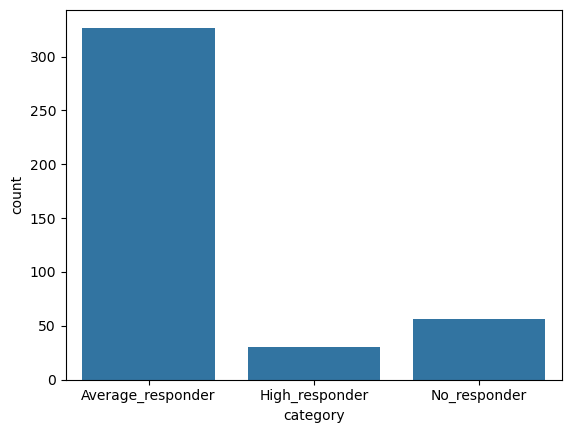

In [26]:
sns.countplot(x = metadata["category"])


In [39]:
full_metadata.to_csv("./full_metadata.csv", index= False)

# save the one without Volume metadata
metadata.to_csv("./metadata_excluding_volume.csv", index = False)

Load the gene expression data of the 5 datasets. These contain the normalised (CPM) values of the data. The data will be first scaled individually, then the combined dataset will be scaled together. This would allows amintaining the individual characteristics of each dataset while ensuring consistency across the combined dataset

In [28]:
# AOData
AO_genecounts = pyreadr.read_r("./gene_extracts/cpm_normalised_PreExc_AO_counts.RDS")
AO_genecounts = AO_genecounts[None]

# scale the values

transformer = FunctionTransformer(np.log1p, validate=True)
AO_transformed = transformer.transform(AO_genecounts.iloc[:, 1:])
AO_transformed = pd.DataFrame(AO_transformed, columns = AO_genecounts.columns[1:])

# Initialise the scaler
scaler2 = StandardScaler()
# scale
AO_scaled = scaler2.fit_transform(AO_transformed)
AO_scaled = pd.DataFrame(AO_scaled, columns = AO_genecounts.columns[1:])

AO_scaled.insert(0, 'gene_id', AO_genecounts['gene_id'])
AO_scaled = AO_scaled.round(2)
AO_scaled


C:\Users\chidimmpe\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,gene_id,s104,s112,s13,s130,s136,s147,s153,s159,s170,...,s822,s828,s859,s874,s875,s883,s89,s891,s903,s96
0,ENSG00000000003.16,-0.91,-0.68,-1.00,-1.02,-0.77,-1.03,-0.74,-0.69,-0.88,...,-0.55,-0.84,-0.78,-0.65,-0.76,-0.62,-0.75,-0.74,-0.67,-0.62
1,ENSG00000000419.14,0.32,0.33,0.28,0.21,0.35,0.34,0.18,0.38,0.32,...,0.20,0.26,0.20,0.31,0.21,0.47,0.29,0.30,0.29,0.51
2,ENSG00000000457.14,-0.46,-0.43,-0.50,-0.26,-0.36,-0.41,-0.46,-0.32,-0.33,...,-0.32,-0.32,-0.34,-0.32,-0.23,-0.18,-0.31,-0.38,-0.30,-0.31
3,ENSG00000000971.17,0.04,0.31,-0.01,0.14,0.25,0.32,-0.02,0.18,0.14,...,0.21,0.09,0.81,0.04,-0.08,-0.03,-0.09,-0.12,0.16,0.05
4,ENSG00000001036.14,-0.69,-0.50,-0.64,-0.87,-0.51,-0.55,-0.56,-0.70,-0.56,...,-0.57,-0.60,-0.58,-0.80,-0.62,-0.80,-0.81,-0.66,-0.61,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,ENSG00000310523.1,0.07,0.02,0.33,0.44,-0.01,0.13,0.38,-0.02,0.13,...,0.30,0.06,0.47,0.26,0.47,0.34,0.11,0.26,0.07,0.17
13409,ENSG00000310526.1,0.18,0.63,0.68,0.67,0.25,0.45,0.69,0.17,0.55,...,0.63,0.38,0.52,0.52,0.40,0.43,0.30,0.61,0.56,0.46
13410,ENSG00000310527.1,0.20,0.46,0.67,0.60,0.20,0.41,0.45,0.42,0.11,...,0.31,0.03,0.26,0.20,-0.02,0.34,0.12,0.58,0.28,0.56
13411,ENSG00000310533.1,-1.03,-0.83,-0.95,-0.94,-0.79,-1.06,-0.79,-1.15,-1.37,...,-0.96,-0.43,-0.94,-1.24,-0.95,-0.67,-1.05,-0.74,-1.33,-0.84


In [29]:
# Contratrain
Contratrain_genecounts = pyreadr.read_r("./gene_extracts/cpm_normalised_PreExc_contratrain_counts.RDS")
Contratrain_genecounts = Contratrain_genecounts[None]

# scale the values

Contratrain_transformed = transformer.transform(Contratrain_genecounts.iloc[:, 1:])
Contratrain_transformed = pd.DataFrame(Contratrain_transformed, columns = Contratrain_genecounts.columns[1:])


# scale
Contratrain_scaled = scaler2.fit_transform(Contratrain_transformed)
Contratrain_scaled = pd.DataFrame(Contratrain_scaled, columns = Contratrain_genecounts.columns[1:])

Contratrain_scaled.insert(0, 'gene_id', Contratrain_genecounts['gene_id'])
Contratrain_scaled = Contratrain_scaled.round(2)
Contratrain_scaled

C:\Users\chidimmpe\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,gene_id,X1.subj1sample1,X2.subj1sample6,X43.subj2sample4,X44.subj2sample6,X75.subj3sample5,X93.subj4sample5,X125.subj5sample4,X130.subj6sample6,X134.subj8sample4,...,X72.subj29sample6,X80.subj30sample4,X83.subj31sample5,X98.subj40sample7,X103.subj41sample2,X108.subj43sample3,X113.subj44sample4,X116.subj45sample4,X121.subj46sample7,X123.subj47sample2
0,ENSG00000000003.16,-0.31,-0.26,-0.55,-0.40,-0.66,-0.45,-0.44,-0.32,-0.50,...,-0.62,-0.45,-0.74,-0.48,-0.52,-0.56,-0.45,-0.39,-0.64,-0.53
1,ENSG00000000419.14,0.87,0.78,0.76,0.79,0.67,0.81,0.75,0.72,0.63,...,0.65,0.78,0.57,0.80,0.72,0.80,0.60,0.46,0.65,0.65
2,ENSG00000000457.14,-0.10,-0.32,-0.17,-0.18,-0.25,0.04,-0.13,-0.16,-0.15,...,-0.27,-0.09,-0.50,-0.22,-0.14,-0.26,-0.10,-0.07,-0.22,-0.26
3,ENSG00000000460.17,-1.20,-1.28,-1.14,-1.45,-1.32,-1.19,-1.28,-1.14,-1.51,...,-1.28,-1.36,-1.31,-1.28,-1.15,-1.09,-1.38,-1.08,-1.24,-1.47
4,ENSG00000000971.17,0.40,0.44,0.51,0.37,0.32,0.68,0.66,0.19,0.33,...,0.68,0.50,0.24,0.57,0.60,0.46,0.22,0.91,0.55,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13774,ENSG00000310523.1,-0.32,-0.29,-0.23,-0.23,-0.22,-0.50,-0.33,-0.42,-0.44,...,-0.35,-0.52,0.14,-0.33,-0.36,-0.58,-0.32,-0.54,-0.19,0.01
13775,ENSG00000310526.1,-0.06,0.24,0.13,0.23,0.35,-0.35,-0.03,-0.23,0.02,...,-0.05,-0.12,0.05,0.04,0.09,-0.39,0.03,-0.60,0.08,0.60
13776,ENSG00000310527.1,-0.39,-0.43,-0.12,0.02,0.19,-0.66,-0.51,-0.37,0.00,...,-0.46,-0.34,0.34,-0.13,-0.11,-0.63,-0.26,-0.70,-0.15,0.21
13777,ENSG00000310533.1,-0.88,-0.95,-1.01,-0.65,-1.05,-0.77,-0.77,-0.81,-0.67,...,-0.83,-0.98,-1.55,-0.83,-0.72,-0.85,-0.66,-0.63,-0.65,-0.51


In [30]:
# Copd
Copd_genecounts = pyreadr.read_r("./gene_extracts/cpm_normalised_PreExc_COPD_counts.RDS")
Copd_genecounts = Copd_genecounts[None]

# scale the values
Copd_transformed = transformer.transform(Copd_genecounts.iloc[:, 1:])
Copd_transformed = pd.DataFrame(Copd_transformed, columns = Copd_genecounts.columns[1:])


# scale
Copd_scaled = scaler2.fit_transform(Copd_transformed)
Copd_scaled = pd.DataFrame(Copd_scaled, columns = Copd_genecounts.columns[1:])

Copd_scaled.insert(0, 'gene_id', Copd_genecounts['gene_id'])
Copd_scaled = Copd_scaled.round(2)
Copd_scaled

C:\Users\chidimmpe\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,gene_id,X102PreExcVLR12,X103PreExcVLR23,X105PreExcVLR38,X106PreExcVLR43,X110PreExcVLL58,X111PreExcVLL67,X111PreExcVLR69,X113PreExcVLL72,X113PreExcVLR74,...,X238PreExcVLL489,X239PreExcVLR496,X242PreExcVLR501,X242PreExcVLL506,X243PreExcVLL509,X243PreExcVLR510,X246PreExcVLR518,X246PreExcVLL519,X249PreExcVLL529,X250PreExcVLR538
0,ENSG00000000003.16,-0.75,-0.99,-0.92,-0.71,-0.92,-0.89,-0.73,-0.89,-0.95,...,-0.90,-1.06,-0.81,-1.13,-0.66,-1.02,-0.85,-0.69,-0.98,-0.71
1,ENSG00000000419.14,0.78,0.79,0.59,0.43,0.43,0.45,0.48,0.48,0.47,...,0.52,0.43,0.77,0.70,0.54,0.46,0.44,0.41,0.49,0.60
2,ENSG00000000457.14,-0.47,-0.27,-0.55,-0.46,-0.43,-0.66,-0.63,-0.46,-0.44,...,-0.52,-0.54,-0.70,-0.46,-0.28,-0.34,-0.40,-0.66,-0.47,-0.31
3,ENSG00000000971.17,0.39,0.44,0.45,0.47,0.29,0.57,0.85,0.41,0.37,...,0.59,0.28,0.66,-0.13,0.66,0.76,0.40,0.53,0.46,0.41
4,ENSG00000001036.14,-0.60,-0.54,-0.42,-0.78,-0.92,-0.49,-0.36,-0.86,-0.66,...,-0.75,-0.83,-0.74,-1.13,-0.66,-0.62,-0.72,-0.93,-1.11,-0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,ENSG00000310517.1,1.90,1.99,1.86,1.71,1.86,1.96,1.94,1.84,1.71,...,1.83,1.76,1.80,1.74,1.85,1.68,1.87,1.85,1.99,1.83
11314,ENSG00000310523.1,-0.98,-1.12,-0.97,-0.55,-0.55,-0.93,-0.55,-0.66,-0.63,...,-0.59,-0.65,-0.68,-0.49,-0.71,-0.81,-0.39,-0.95,-0.81,-0.72
11315,ENSG00000310526.1,-0.88,-0.37,-0.63,-0.16,-0.50,-0.11,-0.05,-0.65,-0.45,...,-0.69,-0.52,-0.47,-0.20,-0.75,-0.34,-0.43,-0.48,-0.31,-0.54
11316,ENSG00000310527.1,-0.75,-0.99,-0.94,-0.71,-0.70,-0.37,-0.53,-0.47,-0.40,...,-0.85,-0.97,-0.48,-0.05,-1.04,-1.09,-0.60,-0.54,-0.71,-0.31


In [31]:
# Relief
Relief_genecounts = pyreadr.read_r("./gene_extracts/cpm_normalised_PreExc_Relief_counts.RDS")
Relief_genecounts = Relief_genecounts[None]

# scale the values
Relief_transformed = transformer.transform(Relief_genecounts.iloc[:, 1:])
Relief_transformed = pd.DataFrame(Relief_transformed, columns = Relief_genecounts.columns[1:])


# scale
Relief_scaled = scaler2.fit_transform(Relief_transformed)
Relief_scaled = pd.DataFrame(Relief_scaled, columns = Relief_genecounts.columns[1:])

Relief_scaled.insert(0, 'gene_id', Relief_genecounts['gene_id'])
Relief_scaled = Relief_scaled.round(2)
Relief_scaled

C:\Users\chidimmpe\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,gene_id,R_8,R_18,R_25,R_30,R_34,R_40,R_42,R_48,R_53,...,R_272,R_301,R_316,R_321,R_331,R_342,R_348,R_352,R_353,R_358
0,ENSG00000000003.16,-0.83,-0.59,-0.90,-0.86,-0.97,-0.78,-0.87,-0.67,-0.73,...,-0.49,-0.59,-0.33,-0.41,-0.74,-0.64,-0.52,-0.72,-0.69,-0.65
1,ENSG00000000419.14,0.15,0.27,0.28,0.24,0.33,0.02,0.15,0.25,0.22,...,0.50,0.43,0.41,0.32,0.38,0.29,0.43,0.35,0.32,0.39
2,ENSG00000000457.14,-0.29,-0.42,-0.48,-0.62,-0.66,-0.43,-0.27,-0.42,-0.34,...,-0.08,-0.24,-0.19,-0.20,-0.42,-0.20,-0.22,-0.06,-0.20,-0.08
3,ENSG00000000460.17,-1.63,-1.45,-1.48,-1.84,-1.56,-1.63,-1.67,-1.57,-1.34,...,-1.63,-1.12,-1.60,-1.46,-1.55,-1.80,-1.39,-1.36,-1.09,-1.16
4,ENSG00000000971.17,-0.30,-0.24,-0.04,0.25,0.22,-0.14,-0.04,0.20,-0.16,...,0.46,0.30,0.90,0.66,0.68,0.45,0.38,0.39,0.49,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,ENSG00000310517.1,1.84,1.74,1.75,1.64,1.70,1.81,1.70,1.61,1.74,...,2.18,2.08,2.09,2.24,2.45,2.19,2.08,2.06,2.00,2.06
13228,ENSG00000310523.1,0.18,0.38,0.34,0.35,0.16,0.43,0.33,0.25,0.32,...,-0.27,-0.20,0.04,-0.18,-0.08,-0.18,-0.03,0.09,-0.03,-0.37
13229,ENSG00000310526.1,0.32,0.58,0.46,0.51,0.62,0.63,0.19,0.63,0.34,...,0.10,0.31,0.34,0.08,0.20,-0.27,0.11,0.31,0.29,0.37
13230,ENSG00000310527.1,0.10,0.40,0.57,0.41,0.46,0.43,0.34,0.55,0.40,...,-0.36,0.05,0.14,-0.35,0.09,-0.27,-0.32,-0.07,-0.19,0.03


In [32]:
# Volume
Volume_genecounts = pyreadr.read_r("./gene_extracts/cpm_normalised_PreExc_vol_counts.RDS")
Volume_genecounts = Volume_genecounts[None]

# scale the values
Volume_transformed = transformer.transform(Volume_genecounts.iloc[:, 1:])
Volume_transformed = pd.DataFrame(Volume_transformed, columns = Volume_genecounts.columns[1:])


# scale
Volume_scaled = scaler2.fit_transform(Volume_transformed)
Volume_scaled = pd.DataFrame(Volume_scaled, columns = Volume_genecounts.columns[1:])

Volume_scaled.insert(0, 'gene_id', Volume_genecounts['gene_id'])
Volume_scaled = Volume_scaled.round(2)
Volume_scaled

C:\Users\chidimmpe\AppData\Local\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,gene_id,FP11w0R,FP11w0L,FP12w0R,FP12w0L,FP13w0L,FP13w0R,FP14w0R,FP14w0L,FP15w0R,...,FP46w0R,FP46w0L,FP5w0R,FP5w0L,FP6w0L,FP6w0R,FP7w0L,FP7w0R,FP9w0R,FP9w0L
0,ENSG00000000003.16,-0.74,-0.85,-0.63,-0.67,-0.66,-0.75,-0.84,-0.89,-0.79,...,-0.58,-1.13,-0.65,-0.65,-0.67,-0.52,-0.87,-0.78,-0.85,-0.75
1,ENSG00000000419.14,0.50,0.56,0.49,0.60,0.61,0.46,0.62,0.47,0.66,...,0.72,0.73,0.60,0.78,0.58,0.59,0.65,0.64,0.63,0.60
2,ENSG00000000457.14,-0.27,-0.35,-0.65,-0.58,-0.76,-0.39,-0.66,-0.55,-0.61,...,-0.27,-0.61,-0.47,-0.41,-0.53,-0.35,-0.45,-0.62,-0.42,-0.36
3,ENSG00000000971.17,0.23,0.07,0.08,0.04,-0.33,-0.14,0.64,0.63,-0.13,...,0.03,0.21,0.14,0.02,0.07,0.35,0.16,0.20,-0.14,-0.04
4,ENSG00000001036.14,-0.58,-0.94,-1.04,-1.02,-1.16,-0.98,-0.55,-0.79,-0.98,...,-0.88,-0.80,-0.84,-0.67,-0.77,-0.72,-0.87,-0.89,-0.76,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358,ENSG00000310517.1,2.15,2.08,1.71,1.73,1.75,1.80,1.87,1.94,1.65,...,1.75,1.75,1.89,1.95,1.71,1.76,1.79,1.80,1.89,1.86
11359,ENSG00000310523.1,-0.60,-0.58,-0.49,-0.48,-0.88,-0.81,-0.54,-0.60,-0.64,...,-0.93,-0.94,-0.72,-0.89,-0.58,-0.93,-1.10,-0.70,-0.48,-0.63
11360,ENSG00000310526.1,-0.15,-0.13,0.03,-0.45,0.10,-0.06,-0.02,0.01,-0.28,...,-0.35,-0.49,-0.24,-0.69,-0.55,-0.62,-0.54,-0.19,-0.06,-0.28
11361,ENSG00000310527.1,-0.85,-0.68,-0.34,-0.47,-0.06,-0.11,-0.51,-0.27,-0.37,...,-0.47,-0.63,-0.70,-0.95,-0.44,-0.75,-0.84,-0.66,-0.35,-0.93


In [33]:
# merge the datasets based on the gene_id column
# Use same order with metadata. Not sure it makes any difference
full_genecounts = AO_scaled.merge(Contratrain_scaled, on = "gene_id").merge(Copd_scaled, on = "gene_id").merge(Relief_scaled, on = "gene_id").merge(Volume_scaled, on = "gene_id")
full_genecounts

,gene_id,s104,s112,s13,s130,s136,s147,s153,s159,s170,...,FP46w0R,FP46w0L,FP5w0R,FP5w0L,FP6w0L,FP6w0R,FP7w0L,FP7w0R,FP9w0R,FP9w0L
0,ENSG00000000003.16,-0.91,-0.68,-1.00,-1.02,-0.77,-1.03,-0.74,-0.69,-0.88,...,-0.58,-1.13,-0.65,-0.65,-0.67,-0.52,-0.87,-0.78,-0.85,-0.75
1,ENSG00000000419.14,0.32,0.33,0.28,0.21,0.35,0.34,0.18,0.38,0.32,...,0.72,0.73,0.60,0.78,0.58,0.59,0.65,0.64,0.63,0.60
2,ENSG00000000457.14,-0.46,-0.43,-0.50,-0.26,-0.36,-0.41,-0.46,-0.32,-0.33,...,-0.27,-0.61,-0.47,-0.41,-0.53,-0.35,-0.45,-0.62,-0.42,-0.36
3,ENSG00000000971.17,0.04,0.31,-0.01,0.14,0.25,0.32,-0.02,0.18,0.14,...,0.03,0.21,0.14,0.02,0.07,0.35,0.16,0.20,-0.14,-0.04
4,ENSG00000001036.14,-0.69,-0.50,-0.64,-0.87,-0.51,-0.55,-0.56,-0.70,-0.56,...,-0.88,-0.80,-0.84,-0.67,-0.77,-0.72,-0.87,-0.89,-0.76,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10921,ENSG00000310517.1,1.82,1.94,1.58,1.89,1.92,1.74,1.54,1.81,1.89,...,1.75,1.75,1.89,1.95,1.71,1.76,1.79,1.80,1.89,1.86
10922,ENSG00000310523.1,0.07,0.02,0.33,0.44,-0.01,0.13,0.38,-0.02,0.13,...,-0.93,-0.94,-0.72,-0.89,-0.58,-0.93,-1.10,-0.70,-0.48,-0.63
10923,ENSG00000310526.1,0.18,0.63,0.68,0.67,0.25,0.45,0.69,0.17,0.55,...,-0.35,-0.49,-0.24,-0.69,-0.55,-0.62,-0.54,-0.19,-0.06,-0.28
10924,ENSG00000310527.1,0.20,0.46,0.67,0.60,0.20,0.41,0.45,0.42,0.11,...,-0.47,-0.63,-0.70,-0.95,-0.44,-0.75,-0.84,-0.66,-0.35,-0.93


In [34]:
# get those without volume data
genecounts = AO_scaled.merge(Contratrain_scaled, on = "gene_id").merge(Copd_scaled, on = "gene_id").merge(Relief_scaled, on = "gene_id")
genecounts

,gene_id,s104,s112,s13,s130,s136,s147,s153,s159,s170,...,R_272,R_301,R_316,R_321,R_331,R_342,R_348,R_352,R_353,R_358
0,ENSG00000000003.16,-0.91,-0.68,-1.00,-1.02,-0.77,-1.03,-0.74,-0.69,-0.88,...,-0.49,-0.59,-0.33,-0.41,-0.74,-0.64,-0.52,-0.72,-0.69,-0.65
1,ENSG00000000419.14,0.32,0.33,0.28,0.21,0.35,0.34,0.18,0.38,0.32,...,0.50,0.43,0.41,0.32,0.38,0.29,0.43,0.35,0.32,0.39
2,ENSG00000000457.14,-0.46,-0.43,-0.50,-0.26,-0.36,-0.41,-0.46,-0.32,-0.33,...,-0.08,-0.24,-0.19,-0.20,-0.42,-0.20,-0.22,-0.06,-0.20,-0.08
3,ENSG00000000971.17,0.04,0.31,-0.01,0.14,0.25,0.32,-0.02,0.18,0.14,...,0.46,0.30,0.90,0.66,0.68,0.45,0.38,0.39,0.49,0.21
4,ENSG00000001036.14,-0.69,-0.50,-0.64,-0.87,-0.51,-0.55,-0.56,-0.70,-0.56,...,-0.40,-0.61,-0.47,-0.48,-0.38,-1.04,-0.71,-0.73,-0.65,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,ENSG00000310517.1,1.82,1.94,1.58,1.89,1.92,1.74,1.54,1.81,1.89,...,2.18,2.08,2.09,2.24,2.45,2.19,2.08,2.06,2.00,2.06
11180,ENSG00000310523.1,0.07,0.02,0.33,0.44,-0.01,0.13,0.38,-0.02,0.13,...,-0.27,-0.20,0.04,-0.18,-0.08,-0.18,-0.03,0.09,-0.03,-0.37
11181,ENSG00000310526.1,0.18,0.63,0.68,0.67,0.25,0.45,0.69,0.17,0.55,...,0.10,0.31,0.34,0.08,0.20,-0.27,0.11,0.31,0.29,0.37
11182,ENSG00000310527.1,0.20,0.46,0.67,0.60,0.20,0.41,0.45,0.42,0.11,...,-0.36,0.05,0.14,-0.35,0.09,-0.27,-0.32,-0.07,-0.19,0.03


In [35]:
full_genecounts.to_csv("./full_genecounts.csv", index= False)

# save the one without Volume metadata
genecounts.to_csv("./genecounts_excluding_volume.csv", index = False)